# Used Car Price Prediction

### Load Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [39]:
cars_df = pd.read_csv( "new_used_car.csv" )

In [40]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,make,model,mileage_new,engine_new,power_new,KM_Driven
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5,hyundai,creta,19.67,1582.0,126.20,4
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9,honda,jazz,18.20,1199.0,88.70,4
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,8,maruti,ertiga,20.77,1248.0,88.76,8
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,7,audi,a4,15.20,1968.0,140.80,4
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,7,nissan,micra,23.08,1461.0,63.10,8


In [41]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4986 non-null   object 
 1   Location           4986 non-null   object 
 2   Year               4986 non-null   int64  
 3   Kilometers_Driven  4986 non-null   int64  
 4   Fuel_Type          4986 non-null   object 
 5   Transmission       4986 non-null   object 
 6   Owner_Type         4986 non-null   object 
 7   Mileage            4986 non-null   object 
 8   Engine             4962 non-null   object 
 9   Power              4962 non-null   object 
 10  Seats              4957 non-null   float64
 11  New_Price          633 non-null    object 
 12  Price              4986 non-null   float64
 13  age                4986 non-null   int64  
 14  make               4986 non-null   object 
 15  model              4986 non-null   object 
 16  mileage_new        4986 

In [42]:
#cars_df = cars_df[cars_df.Year > 2010]

### Feature Set Selection

In [43]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'age', 'make', 'model', 'mileage_new',
       'engine_new', 'power_new', 'KM_Driven'],
      dtype='object')

In [44]:
x_features = ['KM_Driven', 'Fuel_Type',
              'Transmission', 'Owner_Type', 'Seats',
              'make', 'mileage_new', 'engine_new',
              'power_new', 'Location']
## model of the car is not included in the model

In [45]:
cat_features = ['Fuel_Type',
                'Transmission', 'Owner_Type', 
                'make', 'Location']

In [46]:
num_features = list(set(x_features) - set(cat_features))

In [47]:
num_features

['mileage_new', 'KM_Driven', 'Seats', 'engine_new', 'power_new']

In [48]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     4986 non-null   int64  
 1   Fuel_Type     4986 non-null   object 
 2   Transmission  4986 non-null   object 
 3   Owner_Type    4986 non-null   object 
 4   Seats         4957 non-null   float64
 5   make          4986 non-null   object 
 6   mileage_new   4986 non-null   float64
 7   engine_new    4962 non-null   float64
 8   power_new     4889 non-null   float64
 9   Location      4986 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 389.7+ KB


### Dropping Null Values

In [49]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [50]:
cars_df.shape

(4888, 11)

In [51]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
2113,2,Diesel,Manual,First,5.0,maruti,23.40,1248.0,74.00,Kolkata,4.50
1694,6,Petrol,Manual,First,5.0,maruti,20.92,998.0,67.10,Pune,2.10
2044,3,Petrol,Automatic,First,5.0,hyundai,16.95,1197.0,78.90,Coimbatore,3.83
330,5,Petrol,Manual,First,5.0,volkswagen,16.47,1198.0,73.90,Kolkata,2.25
853,5,Petrol,Manual,Second,5.0,hyundai,19.81,1086.0,68.05,Delhi,2.20


### Encode Categorical Variables

In [52]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=cat_features)

In [53]:
encoded_cars_df.sample(5)

,KM_Driven,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
932,2,5.0,18.9,1197.0,81.86,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3084,4,5.0,18.0,1198.0,86.70,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3410,2,5.0,22.7,799.0,53.00,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3803,4,5.0,17.4,1497.0,117.30,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2583,6,5.0,15.2,1968.0,140.80,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
encoded_cars_df.columns

Index(['KM_Driven', 'Seats', 'mileage_new', 'engine_new', 'power_new',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'make_ambassador', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_datsun', 'make_fiat', 'make_force',
       'make_ford', 'make_honda', 'make_hyundai', 'make_isuzu', 'make_jaguar',
       'make_jeep', 'make_land', 'make_mahindra', 'make_maruti',
       'make_mercedes-benz', 'make_mini', 'make_mitsubishi', 'make_nissan',
       'make_porsche', 'make_renault', 'make_skoda', 'make_tata',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune'],
      dtype='object')

In [55]:
encoded_cars_df.shape

(4888, 51)

### Setting X and y variables

In [56]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [59]:
X_train.shape

(3910, 51)

In [60]:
X_train[0:10]

,KM_Driven,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
330,5,5.0,16.47,1198.0,73.9,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4094,10,5.0,17.80,1248.0,75.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1160,3,4.0,17.21,1798.0,189.0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
86,3,7.0,19.83,1198.0,67.0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1804,6,5.0,12.10,2362.0,164.7,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
255,6,5.0,18.90,998.0,67.1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4575,7,5.0,19.30,1248.0,73.9,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2561,2,5.0,16.20,1199.0,74.0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
121,3,5.0,22.00,1197.0,81.8,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1617,3,5.0,20.73,1373.0,91.1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [61]:
X_test.shape

(978, 51)

### Linear Models

Assumes linear relationship between features and outcome variable.

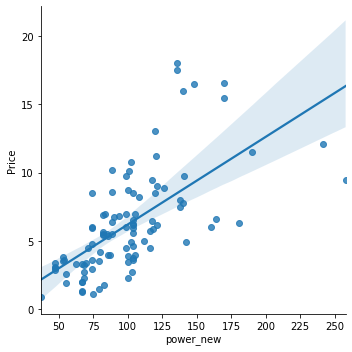

In [82]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lreg_v1 = LinearRegression()

In [65]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [66]:
lreg_v1.intercept_

-1.0473270872656473

In [67]:
lreg_v1.coef_

array([-3.85562345e-01,  7.80653931e-01,  2.43622230e-02, -4.77555760e-04,
        5.32803385e-02,  9.59210678e-01, -9.59210678e-01,  6.22144873e-01,
       -6.22144873e-01,  1.41450579e+00, -1.20083209e+00,  3.63795356e-01,
       -5.77469056e-01,  4.00353782e-01,  2.83141233e+00,  1.65260041e+00,
       -2.85182043e+00, -2.45204723e+00, -2.17304766e+00, -2.22616103e-01,
       -1.17227416e+00, -1.27376418e+00, -9.70057837e-01,  1.16362666e+00,
       -1.37960378e+00,  5.50863616e+00,  6.69007598e+00, -1.50410555e+00,
       -1.02770695e+00,  1.80734054e+00,  8.05622376e+00,  1.55011770e+00,
       -1.16278709e+00, -1.06734913e+01, -1.13229735e+00, -9.48238908e-01,
       -2.33276243e+00,  1.87976118e+00, -1.29698408e+00,  1.03345656e+00,
       -5.62321853e-02,  4.69913986e-01, -7.36022799e-02,  1.45115930e+00,
       -5.86868965e-01,  5.86407297e-01,  1.42318268e-01,  6.65915562e-01,
       -1.88881840e+00, -6.13069975e-01, -9.71226034e-02])

In [68]:
dict(zip(X_train.columns, np.round(lreg_v1.coef_, 3)))

{'KM_Driven': -0.386,
 'Seats': 0.781,
 'mileage_new': 0.024,
 'engine_new': -0.0,
 'power_new': 0.053,
 'Fuel_Type_Diesel': 0.959,
 'Fuel_Type_Petrol': -0.959,
 'Transmission_Automatic': 0.622,
 'Transmission_Manual': -0.622,
 'Owner_Type_First': 1.415,
 'Owner_Type_Fourth & Above': -1.201,
 'Owner_Type_Second': 0.364,
 'Owner_Type_Third': -0.577,
 'make_ambassador': 0.4,
 'make_audi': 2.831,
 'make_bmw': 1.653,
 'make_chevrolet': -2.852,
 'make_datsun': -2.452,
 'make_fiat': -2.173,
 'make_force': -0.223,
 'make_ford': -1.172,
 'make_honda': -1.274,
 'make_hyundai': -0.97,
 'make_isuzu': 1.164,
 'make_jaguar': -1.38,
 'make_jeep': 5.509,
 'make_land': 6.69,
 'make_mahindra': -1.504,
 'make_maruti': -1.028,
 'make_mercedes-benz': 1.807,
 'make_mini': 8.056,
 'make_mitsubishi': 1.55,
 'make_nissan': -1.163,
 'make_porsche': -10.673,
 'make_renault': -1.132,
 'make_skoda': -0.948,
 'make_tata': -2.333,
 'make_toyota': 1.88,
 'make_volkswagen': -1.297,
 'make_volvo': 1.033,
 'Location_Ah

### Predict on test set

In [69]:
y_pred = lreg_v1.predict(X_test)

In [70]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [71]:
y_df.sample(10)

,actual,predicted,residual
1477,8.31,10.854600,2.544600
155,2.60,2.177097,-0.422903
366,14.45,13.034392,-1.415608
2804,11.50,10.672632,-0.827368
2763,8.90,8.106494,-0.793506
2524,13.08,15.594384,2.514384
1326,0.45,1.570247,1.120247
2405,2.70,4.819473,2.119473
3227,3.65,5.370582,1.720582
4269,5.75,4.216912,-1.533088


### Measuring Accuracy

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [74]:
mse_v1

4.140740980273494

In [75]:
rmse_v1 = np.sqrt(mse_v1)

In [76]:
rmse_v1

2.0348810727591657

In [77]:
r2_score(y_test, y_pred)

0.7463108968504226

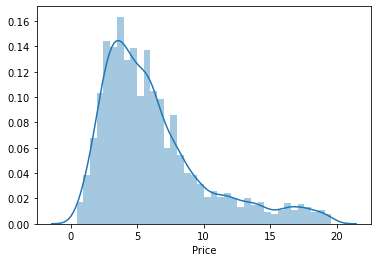

In [78]:
sn.distplot(cars_df.Price)

### Preprocessing data based on business context

1. Removing all cars prior to 2011
2. Making an adjustment to price based on inflation rate. But we need to know the year of sale (not available)
3. Adding the car model as a feature (need to prepare data properly)
4. Taking log of the price (as price is skewed distribution)

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(LinearRegression(),
                         X_train,
                         y_train,
                         cv = 10,
                         scoring = 'r2')

In [45]:
scores

array([0.70528336, 0.72428127, 0.72487969, 0.72525528, 0.71846868,
       0.71980194, 0.73379945, 0.66674624, 0.74047393, 0.68256508])

In [46]:
scores.mean()

0.7141554912219453

In [47]:
scores.std()

0.02189539092292615

### Saving the model

In [48]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [49]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [53]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [51]:
from joblib import dump

In [52]:
dump(my_model, './cars.pkl')

['./cars.pkl']

### Tasks

1. Removing all cars prior to 2011
2. Add age as numerical variable
3. Build a new model
4. Predict on test set and measure the accuracy (RMSE and R Squared values)
5. Do the cross Validation and find the mean and std of the r2 values